In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Надица/data.csv', delimiter=';')


**Alternativna Hipoteza: Students with debtor status are less likely to graduate due to financial stress.**

**Null Hipoteza: Students with debtor status are equally likely to graduate as those without debtor status.**

In [ ]:
#dropnuvanje na enrolled
df = df.drop(df[df['Target'] == 'Enrolled'].index)

In [ ]:
df.Target.value_counts()


,count
Target,
Graduate,2209
Dropout,1421


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


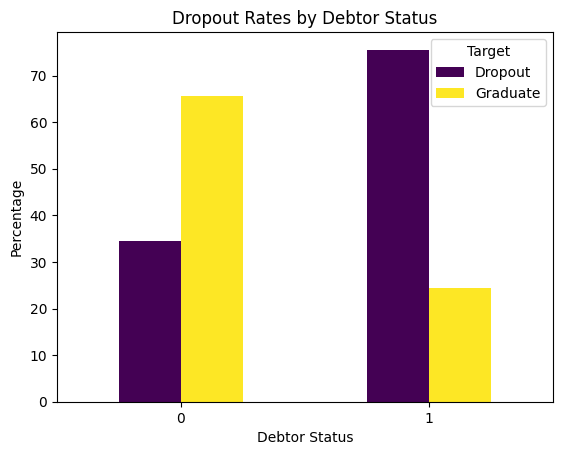

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Debtor'], df['Target'], normalize='index') * 100

# Plot stacked bar chart
contingency_table.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Dropout Rates by Debtor Status')
plt.xlabel('Debtor Status')
plt.ylabel('Percentage')
plt.legend(title='Target')
plt.xticks(rotation=0)
plt.savefig('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Надица/dropout_rate_by_debtor_plot.png')
plt.show()


In [ ]:
# Calculate dropout rates for each debtor status
dropout_rates = contingency_table['Dropout']

# Calculate the percentage difference
percentage_difference = ((dropout_rates[1] - dropout_rates[0]) / dropout_rates[0]) * 100

# Print the result
print(f"Percentage difference in dropout rates: {percentage_difference:.2f}%")


Percentage difference in dropout rates: 119.14%


In [ ]:
# Perform Chi-square test
contingency_table = pd.crosstab(df['Debtor'], df['Target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nFail to reject the null hypothesis")


Chi-Square Statistic: 257.4596177697581
p-value: 6.141423909917533e-58
Degrees of Freedom: 1
Expected Frequencies:
[[1259.32699725 1957.67300275]
 [ 161.67300275  251.32699725]]

Reject the null hypothesis


**Alt: There is a significant association between Scholarship holder and Graduation (Target)**

**null: There is no significant association between Scholarship holder and Graduation (Target)**

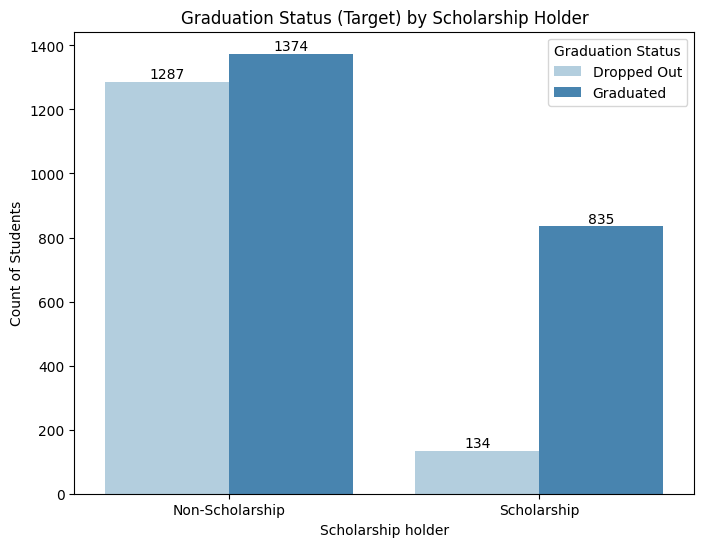

([<matplotlib.axis.YTick at 0x7961679fb280>,
 [Text(0, 0.5, 'Non-Scholarship'), Text(0, 1.5, 'Scholarship')])

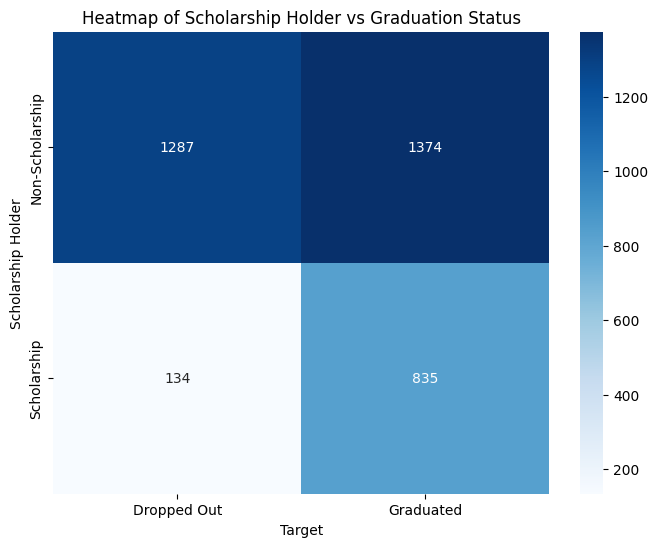

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Scholarship holder'], df['Target'])

# Set up the figure
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='Scholarship holder', hue='Target', data=df, palette='Blues')

# Add counts on top of each bar
for container in ax.containers:
    # Loop through each bar in the container
    ax.bar_label(container, fmt='%d', label_type='edge')

# Set plot details
plt.title('Graduation Status (Target) by Scholarship Holder')
plt.ylabel('Count of Students')
plt.xticks([0, 1], ['Non-Scholarship', 'Scholarship'])
plt.legend(title='Graduation Status', labels=['Dropped Out', 'Graduated'])
plt.savefig('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Надица/grad_vs_scholarship.png')

# Show the plot
plt.show()

plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels and title
plt.title('Heatmap of Scholarship Holder vs Graduation Status')
plt.ylabel('Scholarship Holder')
plt.xticks([0.5, 1.5], ['Dropped Out', 'Graduated'])  # Rename x-axis labels
plt.yticks([0.5, 1.5], ['Non-Scholarship', 'Scholarship'])  # Rename y-axis labels


In [ ]:
# Given dropout rates
dropout_rate_scholarship = 13.83
dropout_rate_non_scholarship = 48.35

# Calculate the percentage difference in dropout rates
percentage_difference_dropout = ((dropout_rate_scholarship - dropout_rate_non_scholarship) / dropout_rate_non_scholarship) * 100
percentage_difference_dropout


-71.39607032057911

In [ ]:
contingency_table = pd.crosstab(df['Scholarship holder'], df['Target'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected values:\n{expected}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a significant association between Scholarship holder and Graduation (Target).")
else:
    print("There is no significant association between Scholarship holder and Graduation (Target).")

Chi-square statistic: 354.22
P-value: 0.0000
Degrees of freedom: 1
Expected values:
[[1041.67520661 1619.32479339]
 [ 379.32479339  589.67520661]]
There is a significant association between Scholarship holder and Graduation (Target).


In [ ]:
print(contingency_table)

Target              Dropout  Graduate
Scholarship holder                   
0                      1287      1374
1                       134       835



**Students with higher previous qualifications (e.g., higher grades from high school) achieve better results in the current program.**

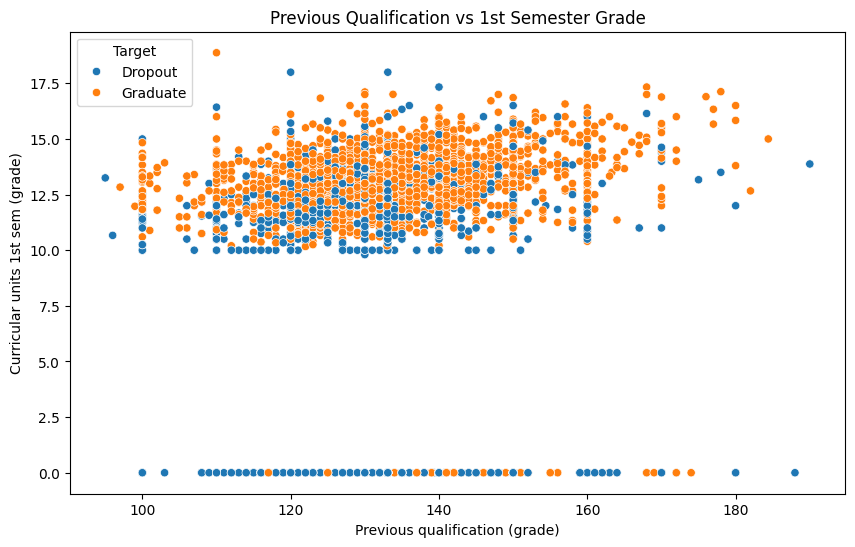

Pearson Correlation Coefficient: 0.077
p-value: 0.00000


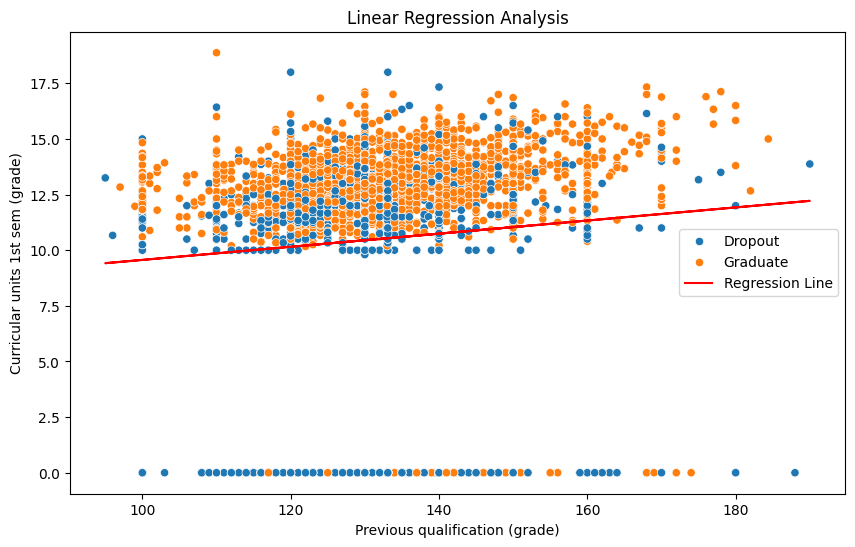

Linear Regression Coefficient: 0.029
Intercept: 6.615
R-squared: 0.006


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np


# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous qualification (grade)', y='Curricular units 1st sem (grade)', hue='Target')
plt.title('Previous Qualification vs 1st Semester Grade')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Curricular units 1st sem (grade)')
plt.legend(title='Target')
plt.savefig('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Надица/accademic_scatterplot.png')
plt.show()

# Pearson Correlation Test
x = df['Previous qualification (grade)']
y = df['Curricular units 1st sem (grade)']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.3f}')
print(f'p-value: {p_value:.5f}')

# Linear Regression
x_reshaped = x.values.reshape(-1, 1)
y_reshaped = y.values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x_reshaped, y_reshaped)

# Regression Line Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous qualification (grade)', y='Curricular units 1st sem (grade)', hue='Target')
plt.plot(x, regressor.predict(x_reshaped), color='red', label='Regression Line')
plt.title('Linear Regression Analysis')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Curricular units 1st sem (grade)')
plt.legend()
plt.savefig('/content/drive/MyDrive/МнИвИКТ проект/Организација на истражување/Надица/LinRegAccademic_scatterplot.png')
plt.show()

# Print regression details
print(f'Linear Regression Coefficient: {regressor.coef_[0][0]:.3f}')
print(f'Intercept: {regressor.intercept_[0]:.3f}')
print(f'R-squared: {regressor.score(x_reshaped, y_reshaped):.3f}')
